<a href="https://colab.research.google.com/github/Agrover112/CC1702-ML-Lab/blob/main/DTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [99]:
data=pd.read_csv('/content/Salary.csv')

In [125]:
data

,Company,Job,Degree,Salary more then 100k
0,Google,SalesExecutive,B,0
1,Google,SalesExecutive,M,0
2,Google,Business Manager,B,1
3,Google,Business Manager,M,1
4,Google,Computer Programmer,B,0
5,Google,Computer Programmer,M,1
6,abc pharma,SalesExecutive,M,0
7,abc pharma,Computer Programmer,B,0
8,abc pharma,Business Manager,B,0
9,abc pharma,Business Manager,M,1


In [126]:
data.describe()

,Salary more then 100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Company                16 non-null     object
 1   Job                    16 non-null     object
 2   Degree                 16 non-null     object
 3   Salary more then 100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


Most people in the dataset work at either Facebook or Google

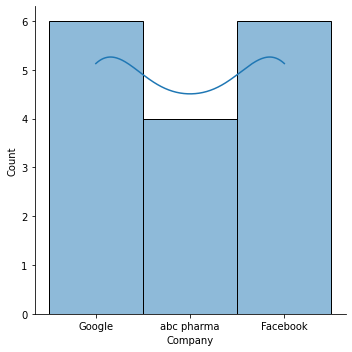

In [128]:
sns.displot(data.Company,kde=True)

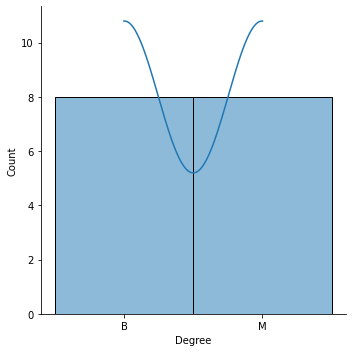

In [129]:
sns.displot(data.Degree,kde=True)

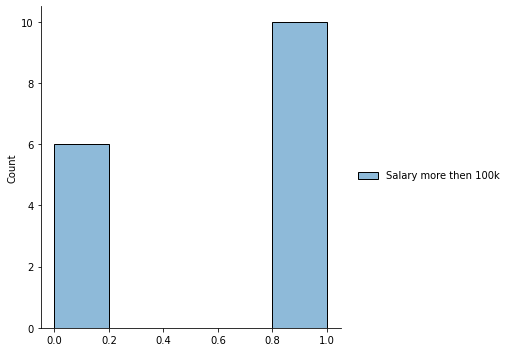

In [130]:
sns.displot(data)

In [131]:
oe=OrdinalEncoder()
#oh=OneHotEncoder()

In [132]:
X=data[['Company','Job','Degree']].copy()
y=data[['Salary more then 100k']].copy()

In [133]:
X=oe.fit_transform(X)
#X=oh.fit_transform(X)

In [134]:
dt=DecisionTreeClassifier(random_state=0,class_weight='balanced')
dt.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [135]:
y_pred=dt.predict(X)

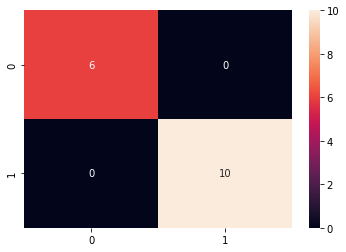

In [136]:
sns.heatmap(confusion_matrix(y,y_pred),annot=True)

It is obvious given such as small dataset it was going to overfit, and it will. This is probably a good stratergy to build a model on huge data by overfitting on a very small subset such as this.

Even splitting into train and test really isn't that indicative of the model's performance.

In [137]:
accuracy_score(y,y_pred)

1.0

This was again bound to happen

In [138]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Predictions

1. Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
2. Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [143]:
vec=np.array([['Google','Computer Programmer','B'],['Google','Computer Programmer','M']])

In [145]:
predictions=dt.predict(oe.transform(vec))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  "X does not have valid feature names, but"


The first entry 1. Gives 0 i.e salart will be LESS than 100K
the second entry 2.Gives 1 i.e salary will be greater than 100K

In [146]:
print(predictions)

[0 1]
